In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [12, 8]
%matplotlib inline

First, we can load the time stamp data to tally the number of "adoptions" each user has.

In [14]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.sort_values(by=['user_id', 'time_stamp'], inplace=True)
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


I checked for this by determining the number of days between each time stamp. If three time stamps must occur within a seven day period, then the total time in between those three time stamps must be 7 days or less.

In [15]:
time_diff_dict = {}
for user_id in tqdm(range(1, 12001)):
    date_diff = []
    user_timestamp = engagement[engagement['user_id'] == user_id]
    for i in range(len(user_timestamp)):
        date_diff = list(user_timestamp['time_stamp'].diff())
    time_diff_dict[user_id] = date_diff

100%|██████████| 12000/12000 [05:40<00:00, 35.20it/s] 


In [16]:
adoption_count = {}
for user in list(time_diff_dict.keys()):
    diff_series = pd.Series(time_diff_dict[user]).dropna()
    user_diffs = list(diff_series)
    num_adoptions = 0
    for i in range(len(user_diffs)):
        try:    
            if (user_diffs[i] + user_diffs[i+1]).days <= 7:
                    num_adoptions += 1
        except:
            num_adoptions += 0
    adoption_count[user] = num_adoptions

Loading in the user table and converting the unix code to a date.

In [18]:
users = pd.read_csv('takehome_users.csv', parse_dates=True, encoding='latin')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [19]:
users['last_session_dt'] = pd.to_datetime(users['last_session_creation_time'], origin='unix', unit='s')
users.drop('last_session_creation_time', axis=1, inplace=True)
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20


The adoption tally was added to the dataframe along with a boolean column which indicates whether there was an adoption. This column will be our labels.

In [20]:
users['adoptions'] = users['object_id'].map(adoption_count)
users['is_adopted'] = users['adoptions'] > 0
users['is_adopted'] = users['is_adopted'].astype(int)
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_dt,adoptions,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,3,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20,0,0


Then I created dummy variables for the creation source column, as those could be important in determining the outcome.

In [21]:
users = pd.get_dummies(users, columns=['creation_source'])
users.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_dt,adoptions,is_adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,0,11,10803.0,2014-04-22 03:53:30,0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,316.0,2014-03-31 03:45:04,3,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,1525.0,2013-03-19 23:14:52,0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,5151.0,2013-05-22 08:09:28,0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,0,193,5240.0,2013-01-22 10:14:20,0,0,1,0,0,0,0


I plotted a few histograms to get a feel for the data such as the one below.

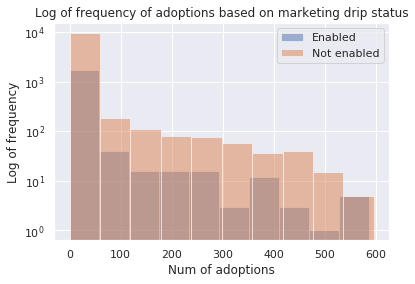

In [51]:
users[users['enabled_for_marketing_drip'] == 1]['adoptions'].hist(alpha=0.5)
users[users['enabled_for_marketing_drip'] == 0]['adoptions'].hist(alpha=0.5)
plt.yscale('log')
plt.xlabel('Num of adoptions')
plt.ylabel('Log of frequency')
plt.legend(['Enabled', 'Not enabled'])
plt.title('Log of frequency of adoptions based on marketing drip status')
plt.show()

Defining some helper functions to allow us to visualize the models later.

In [48]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, average_precision_score, precision_recall_curve, plot_precision_recall_curve

def plot_roc_curve(model, X_test, y_test, name):
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    no_skill = np.zeros(len(y_test))
    tpr, fpr, thresh = roc_curve(y_test, probs, pos_label=0)
    ns_tpr, ns_fpr, ns_thresh = roc_curve(y_test, no_skill, pos_label=0)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill, AUC = %.2f' % auc(ns_fpr, ns_tpr))
    plt.plot(fpr, tpr, marker='.', markersize=0.1, label='%s, AUC = %.2f' % (name, auc(fpr, tpr)))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve for %s' % name, fontsize=18)
    plt.legend()
    plt.show()

def plot_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.xticks(ticks=[0.5, 1.5], fontsize=14)
    plt.yticks(ticks=[0.5, 1.5], fontsize=14)
    plt.xlabel('Predicted labels', fontsize=16)
    plt.ylabel('True labels', fontsize=16)
    plt.title('Confusion Matrix', fontsize=18)
    plt.tight_layout()
    plt.show()

Features and labels were extracted from the dataframe and were split into train/test sets.

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV

features = users[['is_adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
                  'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 
                  'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH']]
X = features.iloc[:, 1:]
y = features['is_adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

I am only showing logistic regression models on this notebook, but I attempted all of these steps with random forest and gradient boosting models as well. They yielded similar or worse results, which is why they are not included.

I decided against using a support vector machine (despite being a good candidate for it) because I need to discuss feature importance and SVMs are not known for their interpretability. 

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=16).fit(X_train, y_train)
print('Train accuracy:', log_reg.score(X_train, y_train), 'Test accuracy:', log_reg.score(X_test, y_test))

Train accuracy: 0.8633333333333333 Test accuracy: 0.858


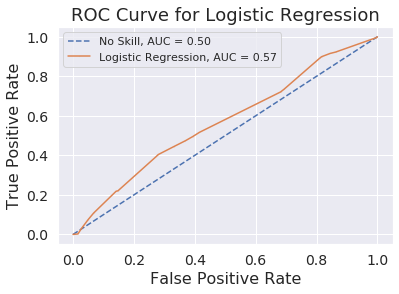

In [28]:
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')

Because we have an imbalanced class size, our model is attempting to increase its accuracy by only predicted the majority class. This is evidenced by the confusion matrix. Because of the imbalanced class sizes, we will need to change our metric of choice and consider resampling methods.

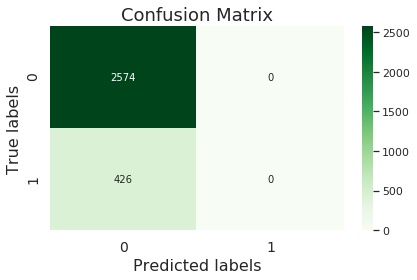

In [29]:
plot_confusion_matrix(log_reg, X_test, y_test)

Our new metric will be the F1 score and the new visualization will be the precision-recall curve.

In [30]:
y_pred = log_reg.predict(X_test)
f1_score(y_true=y_test, y_pred=y_pred)

0.0

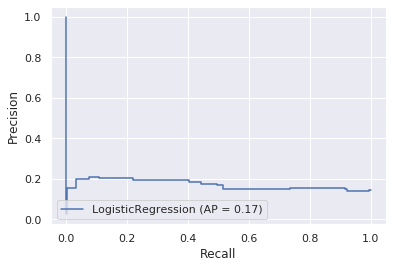

In [32]:
plot_precision_recall_curve(log_reg, X_test, y_test)
plt.show()

First, I tried resampling the minority class to match the number of entries in the majority class. Then I fit the data to another logistic regression model.

In [33]:
from sklearn.utils import resample

train_data = pd.concat([X_train, y_train], axis=1)
not_adopted = train_data[train_data.is_adopted==0]
adopted = train_data[train_data.is_adopted==1]

# upsample minority
adopted_upsampled = resample(adopted,
                          replace=True, # sample with replacement
                          n_samples=len(not_adopted), # match number in majority class
                          random_state=16) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_adopted, adopted_upsampled])

X_up = upsampled.drop('is_adopted', axis=1)
y_up = upsampled['is_adopted']

There is a noticeable improvement in performance!

In [34]:
log_up = LogisticRegression(random_state=16).fit(X_up, y_up)
y_pred = log_up.predict(X_test)
f1_score(y_true=y_test, y_pred=y_pred)

0.24801901743264657

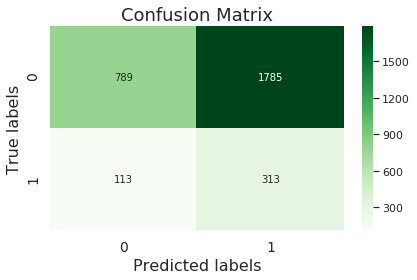

In [35]:
plot_confusion_matrix(log_up, X_test, y_test)

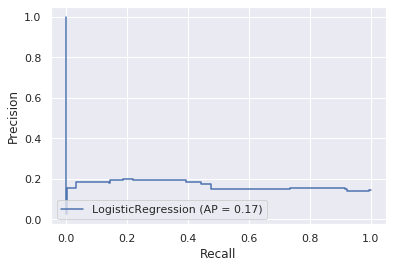

In [36]:
plot_precision_recall_curve(log_up, X_test, y_test)

The imblearn package has tools that can handle resampling data due to class imbalances, so we can try using these methods. SMOTE was used to oversample the minority class and RandomUnderSampler was used to undersample the majority class.

In [37]:
!pip install imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [38]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X_imb_t, y_imb_t = pipeline.fit_resample(X_train, y_train)
X_imb, y_imb = pipeline.fit_resample(X, y)

Five-fold grid search cross validation was performed in order to optimize the regularization parameter C.

In [40]:
lr_imb = LogisticRegression(random_state=16)
param_grid = {'C':[0.001, 0.1, 1, 10, 100]}
cv_imb = GridSearchCV(estimator=lr_imb, param_grid=param_grid, cv=5, scoring='f1')
cv_imb.fit(X_imb, y_imb)
print("Best parameters from gridsearch:", cv_imb.best_params_)

Best parameters from gridsearch: {'C': 0.001}


Unfortunately, this did not help.

In [41]:
y_pred = cv_imb.predict(X_test)
f1_score(y_true=y_test, y_pred=y_pred)

0.0

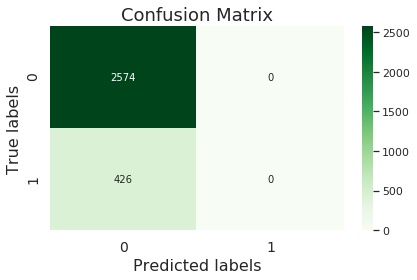

In [42]:
plot_confusion_matrix(cv_imb, X_test, y_test)

Finally we will use our most successful model so far, the logistic regression model with upsampled data, and perform cross validation in order to tune the regularization parameter.

In [44]:
lr_up_cv = LogisticRegression(random_state=16)
param_grid = {'C':[0.001, 0.1, 1, 10, 100]}
cv_up = GridSearchCV(estimator=lr_up_cv, param_grid=param_grid, cv=5, scoring='f1')
cv_up.fit(X_up, y_up)
print("Best parameters from gridsearch:", cv_up.best_params_)

Best parameters from gridsearch: {'C': 0.1}


In [45]:
y_pred = cv_up.predict(X_test)
f1_score(y_true=y_test, y_pred=y_pred)

0.24801901743264657

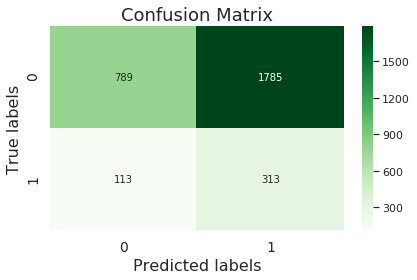

In [46]:
plot_confusion_matrix(cv_up, X_test, y_test)

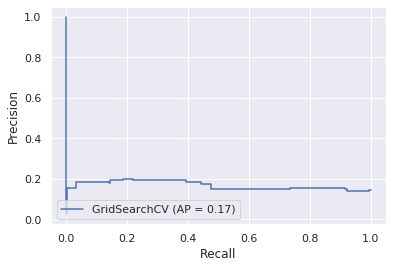

In [47]:
plot_precision_recall_curve(cv_up, X_test, y_test)

We can now examine the feature importances. It seems that signing up through a Google account is the largest positive impact, while signing up through a personal project is the largest negative impact.

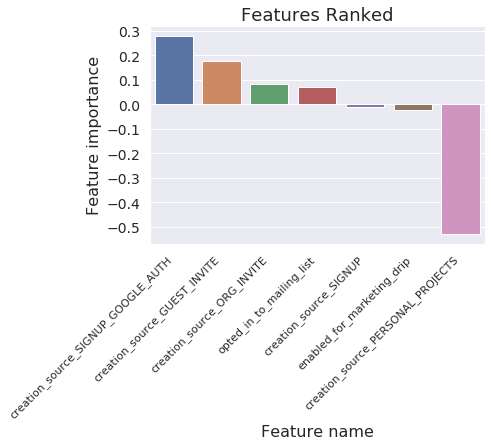

In [50]:
feature_ranks = np.flip(np.argsort(cv_up.best_estimator_.coef_[0]))
feature_names = []
for i in feature_ranks:
    feature_names.append(X.columns[i])
sns.barplot(x=feature_names, y=np.flip(np.sort(cv_up.best_estimator_.coef_[0])))
plt.xticks(rotation=45, fontsize=11, ha='right')
plt.yticks(fontsize=14)
plt.xlabel('Feature name', fontsize=16)
plt.ylabel('Feature importance', fontsize=16)
plt.title('Features Ranked', fontsize=18)
plt.show()